In [491]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, shapiro, ttest_ind
import scipy.stats as st
import statsmodels.api as sm
import missingno as msno
import sklearn as sk

In [446]:
plt.style.use("Solarize_Light2")

In [447]:
df_gliwice = pd.read_excel('data/Gliwice_poprawione.xls', index_col=0)
df_gliwice

,NO,NO2,NOx,PM10,PM2.5,SO2,cisnienie,kier,opad_atm,predk,prom,temp,wilg
2007-01-01,NaN,9.521739,NaN,14.666667,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.347826,NaN,22.291667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.476190,NaN,17.217391,NaN,2.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,20.047619,NaN,13.333333,NaN,10.952381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,13.565217,NaN,13.791667,NaN,3.260870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,14.347826,26.782609,49.045455,124.708333,101.0,54.173913,986.083333,117.875000,0,1.154167,NaN,"-8,458",94.833333
2014-12-28,2.272727,10.000000,13.095238,53.500000,38.0,24.217391,987.583333,224.521739,0,1.939130,NaN,"-6,971",90.291667
2014-12-29,2.666667,8.272727,12.684211,36.625000,27.0,12.863636,994.750000,307.666667,0.008333,1.880952,NaN,"-5,500",90.458333
2014-12-30,16.478261,16.739130,41.782609,67.142857,83.0,24.391304,1001.541667,253.260870,0.016667,0.808696,NaN,"-8,371",89.166667


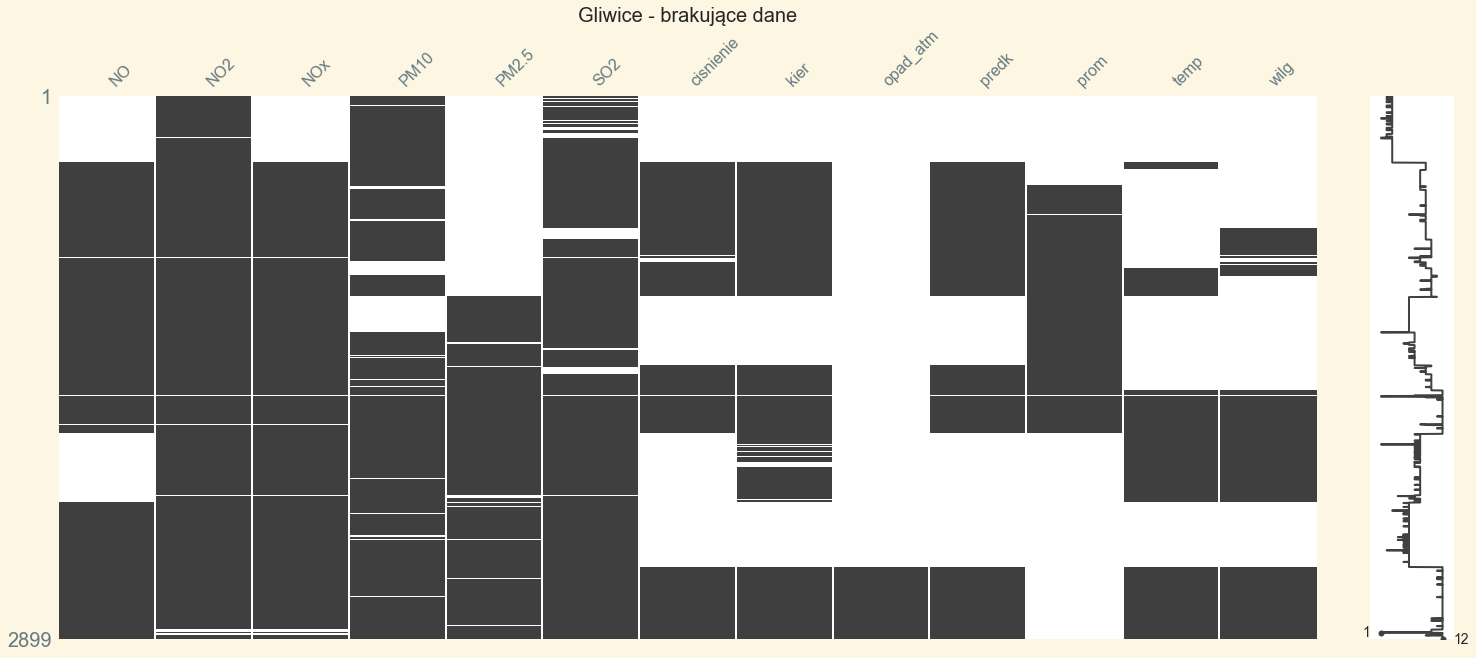

In [448]:
msno.matrix(df_gliwice)
plt.title('Gliwice - brakujące dane', fontsize=20)
plt.show()

In [449]:
df_tychy = pd.read_excel('data/Tychy 24h 2007-2014.xlsx', header=3, skiprows=[4], index_col=0)
df_tychy

,NO,NO2,NOx,O3,PM10,SO2,cisnienie,kier,opad_atm,predk,prom,temp,wilg
2007-01-01,NaN,11.217391,NaN,50.416667,10.125000,9.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.956522,NaN,42.652174,17.291667,9.869565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.652174,NaN,33.608696,18.583333,8.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,11.956522,NaN,44.782609,8.333333,8.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,18.086957,NaN,38.739130,17.625000,13.826087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,5.818182,28.181818,36.863636,NaN,55.875000,38.363636,984.541667,NaN,0.000000,NaN,14.416667,"-7,663",86.916667
2014-12-28,1.739130,17.695652,20.086957,NaN,49.000000,19.652174,985.625000,NaN,0.000000,NaN,10.666667,"-6,154",82.750000
2014-12-29,2.130435,18.043478,20.956522,NaN,41.083333,13.000000,992.916667,NaN,0.000000,NaN,14.333333,"-5,408",79.333333
2014-12-30,16.695652,29.869565,55.217391,NaN,68.500000,23.347826,999.958333,NaN,0.000000,NaN,27.708333,"-8,054",77.083333


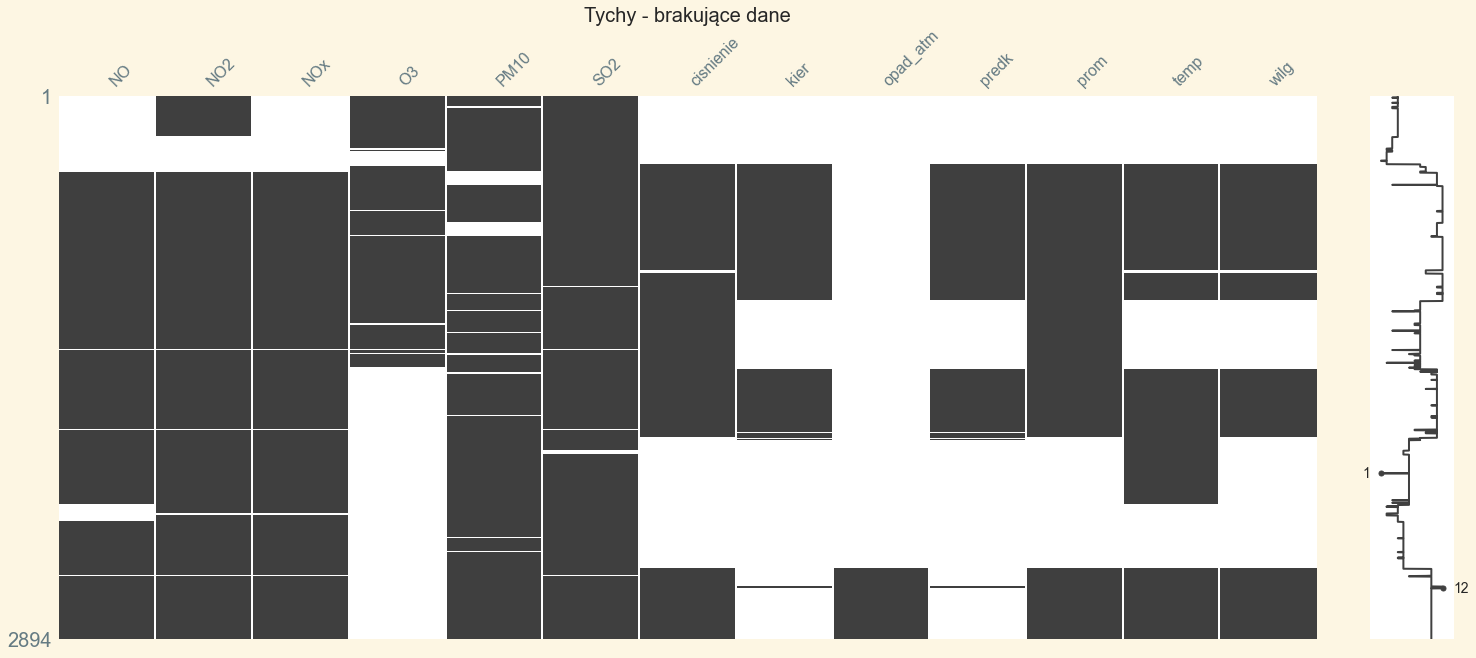

In [450]:
msno.matrix(df_tychy)
plt.title('Tychy - brakujące dane', fontsize=20)
plt.show()

In [451]:
df_gliwice.dtypes

NO           float64
NO2          float64
NOx          float64
PM10         float64
PM2.5        float64
SO2          float64
cisnienie    float64
kier         float64
opad_atm      object
predk        float64
prom         float64
temp          object
wilg         float64
dtype: object

In [452]:
df_gliwice['opad_atm'] = df_gliwice['opad_atm'].str.replace(',', '.').astype(float)

In [453]:
df_gliwice['temp'] = df_gliwice['temp'].str.replace(',', '.').astype(float)

In [454]:
df_tychy.dtypes

NO           float64
NO2          float64
NOx          float64
O3           float64
PM10         float64
SO2          float64
cisnienie    float64
kier         float64
opad_atm     float64
predk        float64
prom         float64
temp          object
wilg         float64
dtype: object

In [455]:
df_tychy['temp'] = df_tychy['temp'].str.replace(',', '.').astype(float)

In [456]:
df_gliwice_named = df_gliwice.copy()
df_gliwice_named.columns = df_gliwice_named.columns.map(lambda x: x + '_Gliwice')
df_gliwice_named

,NO_Gliwice,NO2_Gliwice,NOx_Gliwice,PM10_Gliwice,PM2.5_Gliwice,SO2_Gliwice,cisnienie_Gliwice,kier_Gliwice,opad_atm_Gliwice,predk_Gliwice,prom_Gliwice,temp_Gliwice,wilg_Gliwice
2007-01-01,NaN,9.521739,NaN,14.666667,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.347826,NaN,22.291667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.476190,NaN,17.217391,NaN,2.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,20.047619,NaN,13.333333,NaN,10.952381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,13.565217,NaN,13.791667,NaN,3.260870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,14.347826,26.782609,49.045455,124.708333,101.0,54.173913,986.083333,117.875000,NaN,1.154167,NaN,-8.458,94.833333
2014-12-28,2.272727,10.000000,13.095238,53.500000,38.0,24.217391,987.583333,224.521739,NaN,1.939130,NaN,-6.971,90.291667
2014-12-29,2.666667,8.272727,12.684211,36.625000,27.0,12.863636,994.750000,307.666667,NaN,1.880952,NaN,-5.500,90.458333
2014-12-30,16.478261,16.739130,41.782609,67.142857,83.0,24.391304,1001.541667,253.260870,NaN,0.808696,NaN,-8.371,89.166667


In [457]:
df_tychy_named = df_tychy.copy()
df_tychy_named.columns = df_tychy_named.columns.map(lambda x: x + '_Tychy')
df_tychy_named

,NO_Tychy,NO2_Tychy,NOx_Tychy,O3_Tychy,PM10_Tychy,SO2_Tychy,cisnienie_Tychy,kier_Tychy,opad_atm_Tychy,predk_Tychy,prom_Tychy,temp_Tychy,wilg_Tychy
2007-01-01,NaN,11.217391,NaN,50.416667,10.125000,9.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.956522,NaN,42.652174,17.291667,9.869565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.652174,NaN,33.608696,18.583333,8.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,11.956522,NaN,44.782609,8.333333,8.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,18.086957,NaN,38.739130,17.625000,13.826087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,5.818182,28.181818,36.863636,NaN,55.875000,38.363636,984.541667,NaN,0.000000,NaN,14.416667,-7.663,86.916667
2014-12-28,1.739130,17.695652,20.086957,NaN,49.000000,19.652174,985.625000,NaN,0.000000,NaN,10.666667,-6.154,82.750000
2014-12-29,2.130435,18.043478,20.956522,NaN,41.083333,13.000000,992.916667,NaN,0.000000,NaN,14.333333,-5.408,79.333333
2014-12-30,16.695652,29.869565,55.217391,NaN,68.500000,23.347826,999.958333,NaN,0.000000,NaN,27.708333,-8.054,77.083333


In [458]:
df = pd.merge(df_gliwice_named, df_tychy_named, left_index=True, right_index=True)
df

,NO_Gliwice,NO2_Gliwice,NOx_Gliwice,PM10_Gliwice,PM2.5_Gliwice,SO2_Gliwice,cisnienie_Gliwice,kier_Gliwice,opad_atm_Gliwice,predk_Gliwice,...,O3_Tychy,PM10_Tychy,SO2_Tychy,cisnienie_Tychy,kier_Tychy,opad_atm_Tychy,predk_Tychy,prom_Tychy,temp_Tychy,wilg_Tychy
2007-01-01,NaN,9.521739,NaN,14.666667,NaN,4.000000,NaN,NaN,NaN,NaN,...,50.416667,10.125000,9.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.347826,NaN,22.291667,NaN,NaN,NaN,NaN,NaN,NaN,...,42.652174,17.291667,9.869565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.476190,NaN,17.217391,NaN,2.750000,NaN,NaN,NaN,NaN,...,33.608696,18.583333,8.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,20.047619,NaN,13.333333,NaN,10.952381,NaN,NaN,NaN,NaN,...,44.782609,8.333333,8.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,13.565217,NaN,13.791667,NaN,3.260870,NaN,NaN,NaN,NaN,...,38.739130,17.625000,13.826087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,14.347826,26.782609,49.045455,124.708333,101.0,54.173913,986.083333,117.875000,NaN,1.154167,...,NaN,55.875000,38.363636,984.541667,NaN,0.000000,NaN,14.416667,-7.663,86.916667
2014-12-28,2.272727,10.000000,13.095238,53.500000,38.0,24.217391,987.583333,224.521739,NaN,1.939130,...,NaN,49.000000,19.652174,985.625000,NaN,0.000000,NaN,10.666667,-6.154,82.750000
2014-12-29,2.666667,8.272727,12.684211,36.625000,27.0,12.863636,994.750000,307.666667,NaN,1.880952,...,NaN,41.083333,13.000000,992.916667,NaN,0.000000,NaN,14.333333,-5.408,79.333333
2014-12-30,16.478261,16.739130,41.782609,67.142857,83.0,24.391304,1001.541667,253.260870,NaN,0.808696,...,NaN,68.500000,23.347826,999.958333,NaN,0.000000,NaN,27.708333,-8.054,77.083333


In [459]:
df.index = pd.to_datetime(df.index)
df = df.asfreq('d')

In [460]:
def show_stats(dataframe):
    return pd.DataFrame({
        'Ważne obserwacje': (~dataframe.isna()).sum(),
        '% Ważnych obserwacji': round((~dataframe.isna()).sum() / len(dataframe) * 100, 1),
        'Średnia': dataframe.mean(),
        'Mediana': dataframe.median(),
        'Minimum': dataframe.min(),
        'Maksimum': dataframe.max(),
        'Odchylenie standardowe': dataframe.std()
    })

stats = show_stats(df)
stats

,Ważne obserwacje,% Ważnych obserwacji,Średnia,Mediana,Minimum,Maksimum,Odchylenie standardowe
NO_Gliwice,2124,72.7,11.184276,4.800395,0.000000,202.565217,16.936140
NO2_Gliwice,2797,95.7,25.326198,23.565217,2.869565,89.086957,13.013892
NOx_Gliwice,2452,83.9,42.696769,31.978261,3.304348,369.782609,36.409990
PM10_Gliwice,2508,85.8,45.938730,36.062500,6.695652,344.958333,35.097714
PM2.5_Gliwice,1738,59.5,36.603855,26.000000,2.500000,256.000000,32.937656
SO2_Gliwice,2693,92.2,13.128484,8.217391,1.391304,125.043478,14.176684
cisnienie_Gliwice,1423,48.7,986.236537,986.291667,955.833333,1007.500000,7.655227
kier_Gliwice,1751,59.9,187.352009,191.333333,0.408333,340.916667,73.062782
opad_atm_Gliwice,1,0.0,0.000000,-0.000000,-0.000000,-0.000000,NaN
predk_Gliwice,1445,49.5,1.100144,0.960870,0.216667,5.416667,0.586203


In [461]:
stats[stats['% Ważnych obserwacji'] > 85]

,Ważne obserwacje,% Ważnych obserwacji,Średnia,Mediana,Minimum,Maksimum,Odchylenie standardowe
NO2_Gliwice,2797,95.7,25.326198,23.565217,2.869565,89.086957,13.013892
PM10_Gliwice,2508,85.8,45.938730,36.062500,6.695652,344.958333,35.097714
SO2_Gliwice,2693,92.2,13.128484,8.217391,1.391304,125.043478,14.176684
NO2_Tychy,2670,91.4,25.084916,22.956522,5.652174,95.000000,11.253725
PM10_Tychy,2657,90.9,40.657366,31.541667,5.166667,417.208333,32.513401
SO2_Tychy,2828,96.8,16.335227,10.913043,1.695652,175.608696,16.106226


In [462]:
cols_gliwice = [
    'NO_Gliwice',
    'NO2_Gliwice',
    'NOx_Gliwice',
    'PM10_Gliwice',
    'PM2.5_Gliwice',
    'SO2_Gliwice',
    'cisnienie_Gliwice',
    'kier_Gliwice',
    'predk_Gliwice',
    'prom_Gliwice',
    'temp_Gliwice',
    'wilg_Gliwice'
]

cols_tychy = [
    'NO_Tychy',
    'NO2_Tychy',
    'NOx_Tychy',
    'O3_Tychy',
    'PM10_Tychy',
    'SO2_Tychy',
    'cisnienie_Tychy',
    'kier_Tychy',
    'opad_atm_Tychy',
    'predk_Tychy',
    'prom_Tychy',
    'temp_Tychy',
    'wilg_Tychy'
]

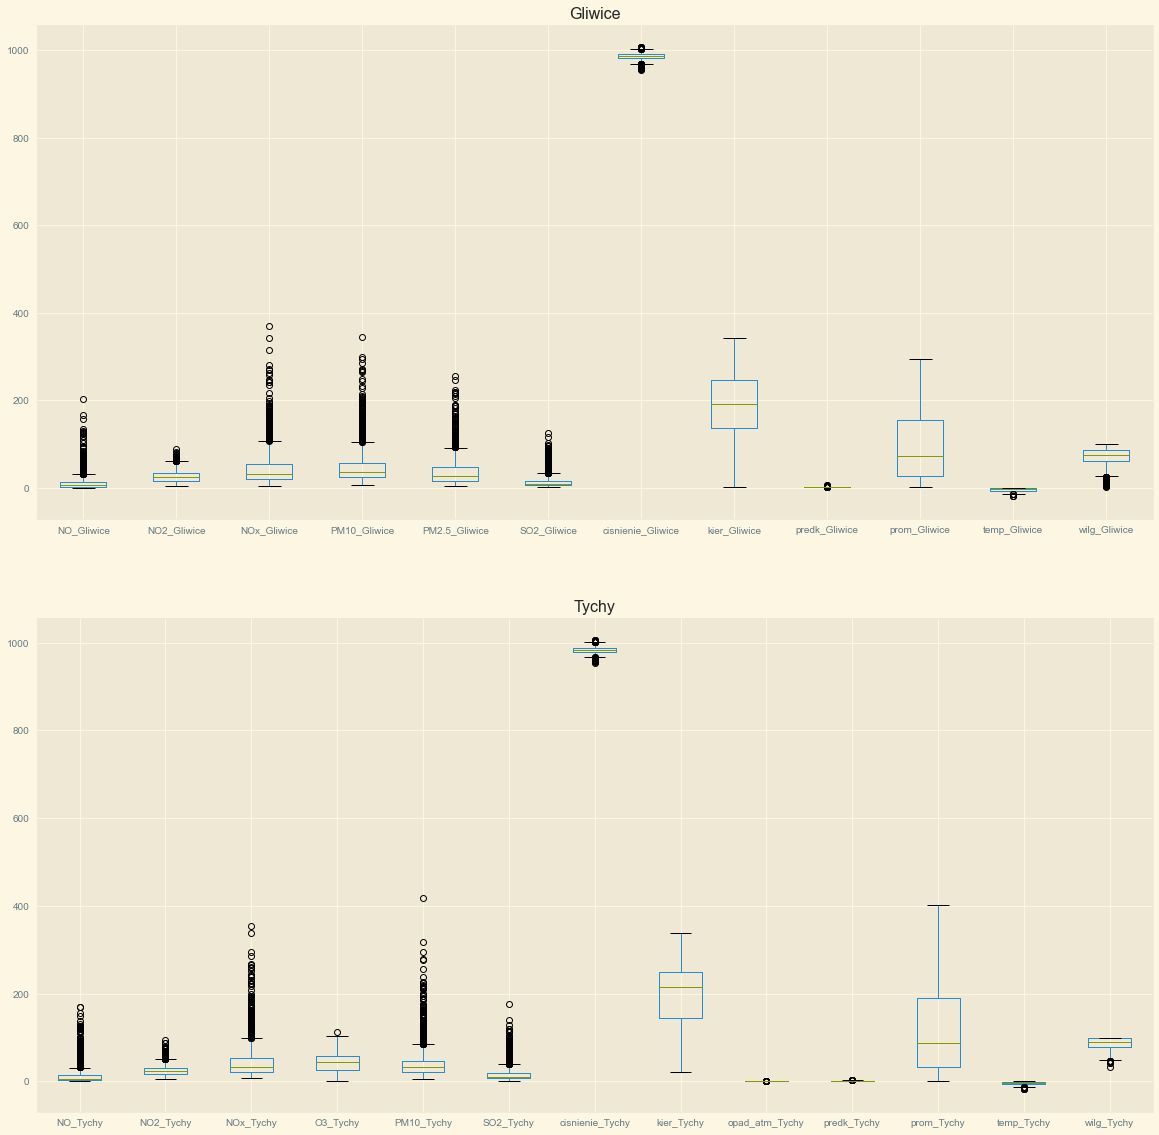

In [463]:
fig, axes = plt.subplots(2)

fig.set_size_inches(20, 20)

df[cols_gliwice].boxplot(ax=axes[0])
axes[0].set_title('Gliwice')
df[cols_tychy].boxplot(ax=axes[1])
axes[1].set_title('Tychy')
plt.show()

In [464]:
to_check = ['PM10', 'SO2']

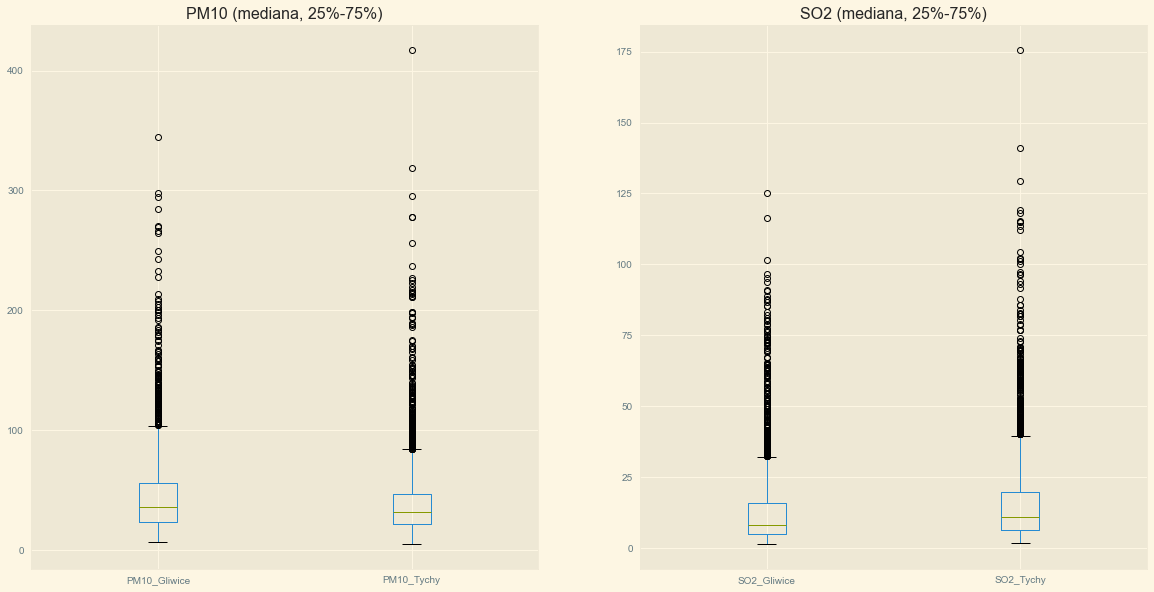

In [465]:
shared_variables = to_check
def show_boxplots():
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10 * 2, 10)

    for i, shared_variable in enumerate(shared_variables):
        cols = [shared_variable + '_Gliwice', shared_variable + '_Tychy']
        ax = axes[i]
        df[cols].boxplot(ax=ax)
        ax.set_title(f'{shared_variable} (mediana, 25%-75%)')
    plt.show()

show_boxplots()

In [466]:
def show_histogram(variable: pd.Series):
    variable = variable.dropna()

    plt.figure(figsize=(12, 8))
    mu, sd = norm.fit(variable)
    ax = sns.histplot(variable, bins=40, stat='density')
    plt.ylabel('Gęstość')

    x_min, x_max = plt.xlim()
    x = np.linspace(x_min, x_max, 100)
    sns.lineplot(x=x, y=norm.pdf(x, mu, sd), color='red')
    plt.xlim(0)

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    (s, p) = shapiro(variable)
    ax.text(0.75, 0.975, f'SW-W={round(s, 4)}; p={round(p, 4)}', transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    plt.show()
    fig, ax = plt.subplots(figsize=(12, 8))
    sm.qqplot(variable, line='45', ax=ax,fit=True)
    ax.text(0.75, 0.975, f'SW-W={round(s, 4)}; p={round(p, 4)}', transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    plt.show()

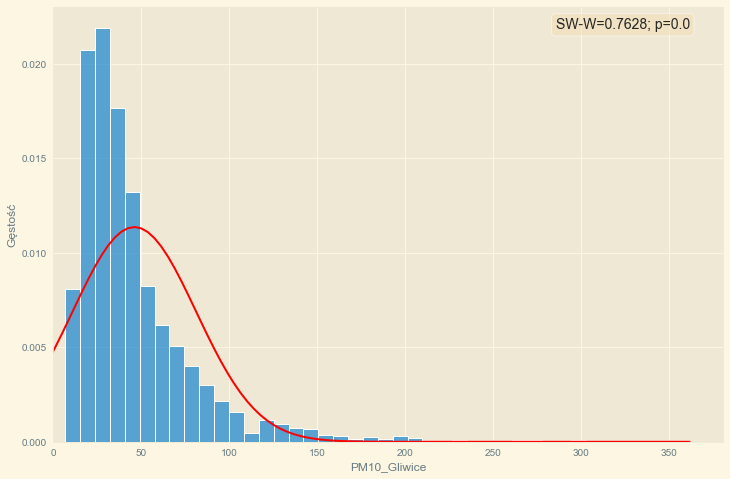

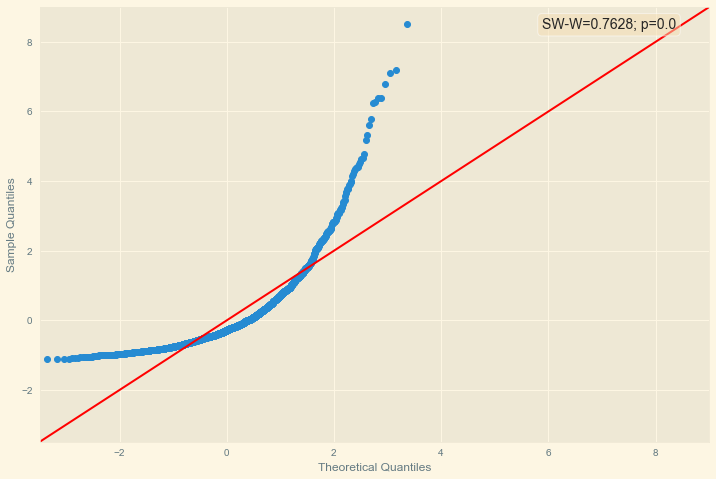

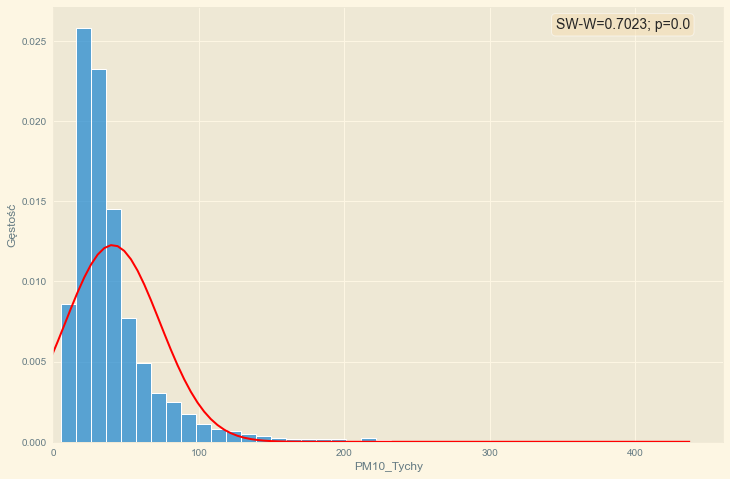

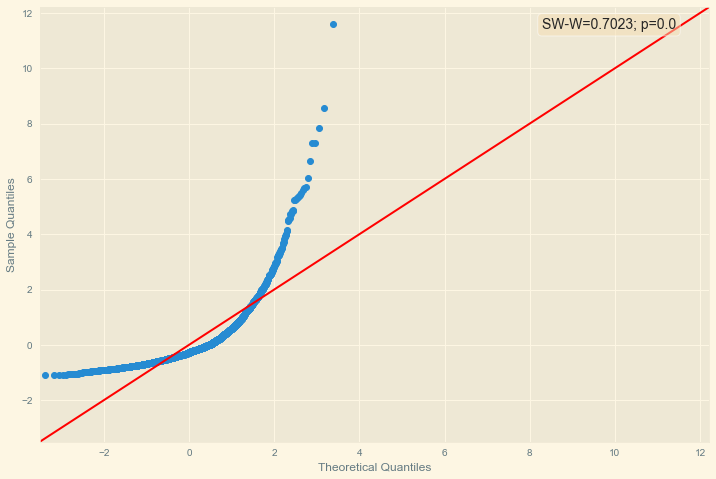

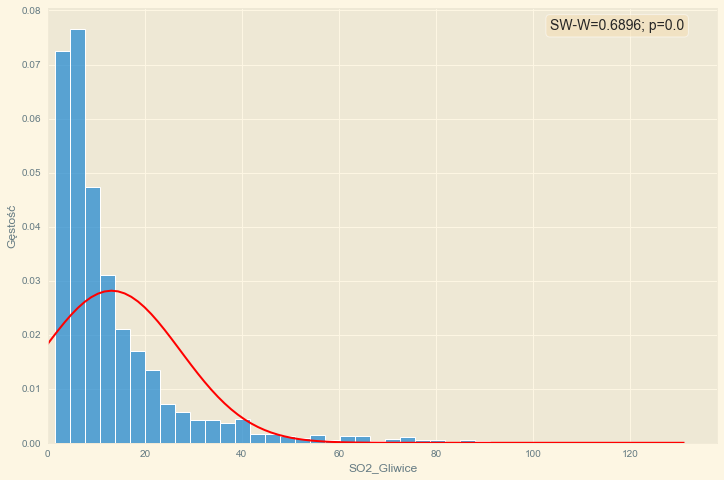

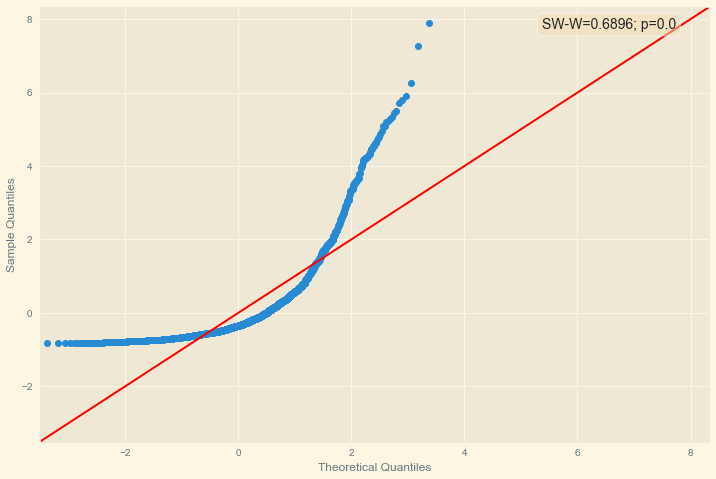

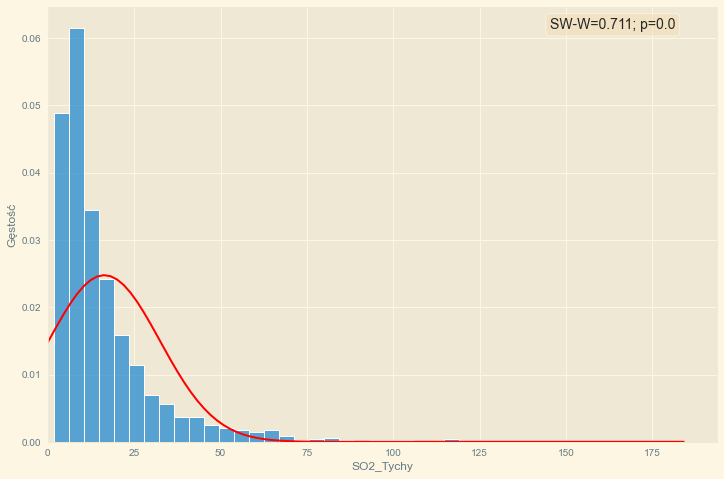

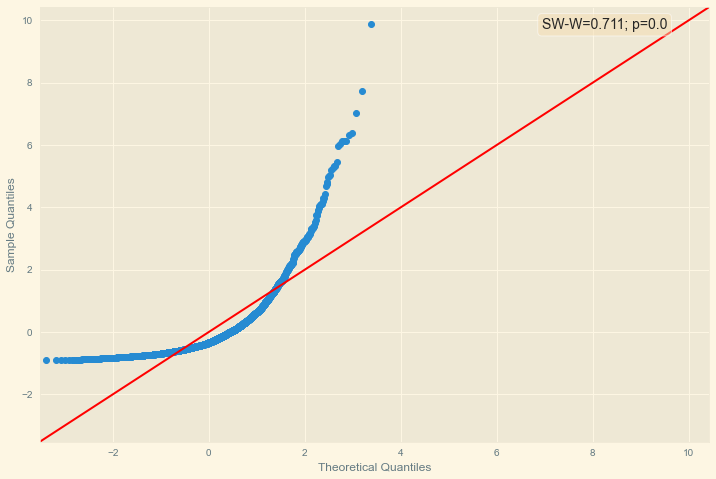

In [467]:
cols = ['PM10_Gliwice', 'PM10_Tychy', 'SO2_Gliwice', 'SO2_Tychy']
for col in cols:
    show_histogram(df[col])

In [468]:
q = 0.96
df[df > df.quantile(q)][cols].count().T

PM10_Gliwice    101
PM10_Tychy      107
SO2_Gliwice     108
SO2_Tychy       114
dtype: int64

In [469]:
df[df > df.quantile(q)][cols].count().T / df[cols].count()

PM10_Gliwice    0.040271
PM10_Tychy      0.040271
SO2_Gliwice     0.040104
SO2_Tychy       0.040311
dtype: float64

In [470]:
df[df[cols] > df[cols].quantile(q)][cols] = df[cols].quantile(q)

for col in cols:
    quantile = df[col].quantile(q)
    df.loc[df[col] > quantile, col] = quantile

In [471]:
show_stats(df[cols])

,Ważne obserwacje,% Ważnych obserwacji,Średnia,Mediana,Minimum,Maksimum,Odchylenie standardowe
PM10_Gliwice,2508,85.8,44.218136,36.062500,6.695652,124.375072,28.286501
PM10_Tychy,2657,90.9,38.678739,31.541667,5.166667,107.781667,24.132115
SO2_Gliwice,2693,92.2,12.308098,8.217391,1.391304,45.102292,11.007798
SO2_Tychy,2828,96.8,15.476309,10.913043,1.695652,52.163478,12.674987


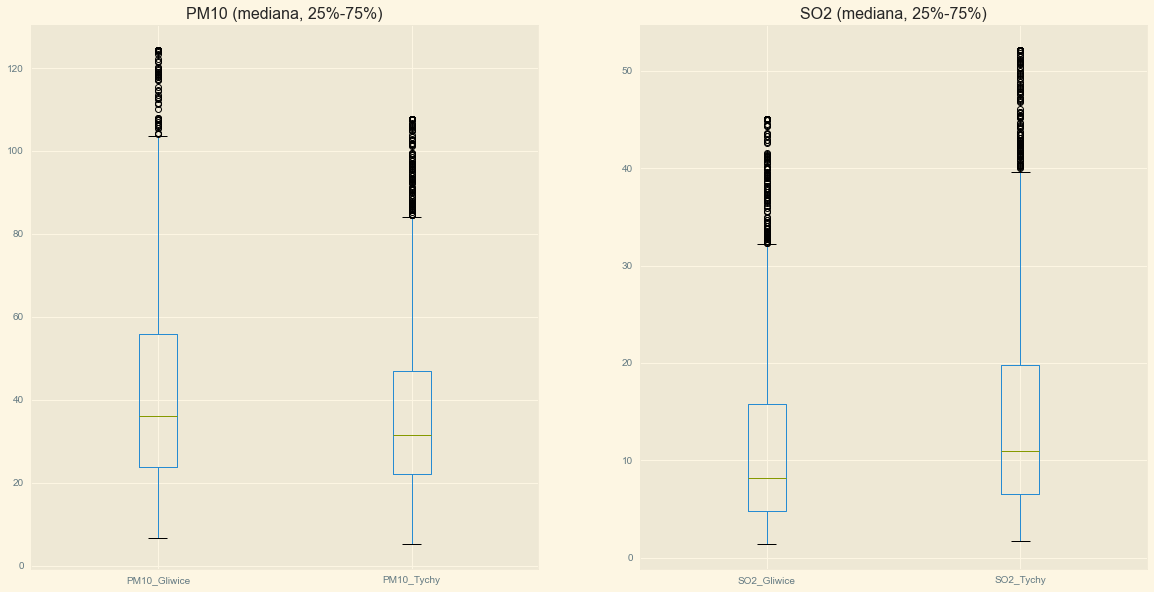

In [472]:
show_boxplots()

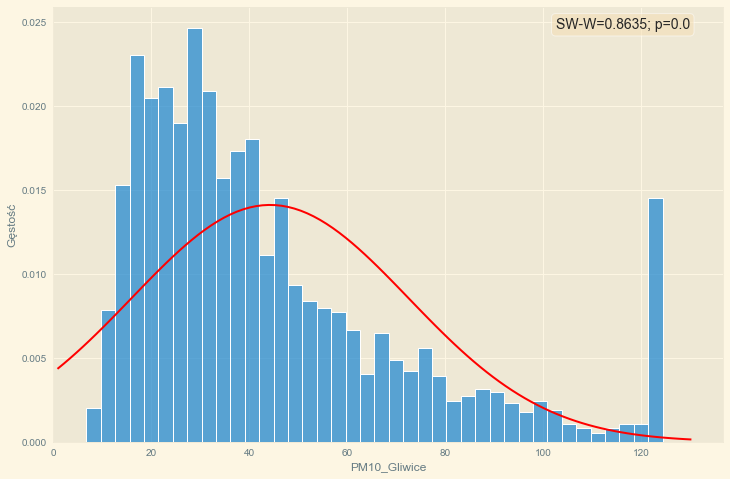

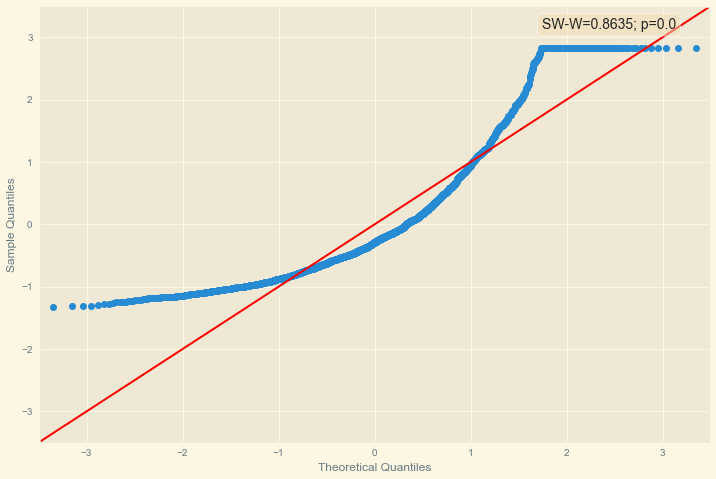

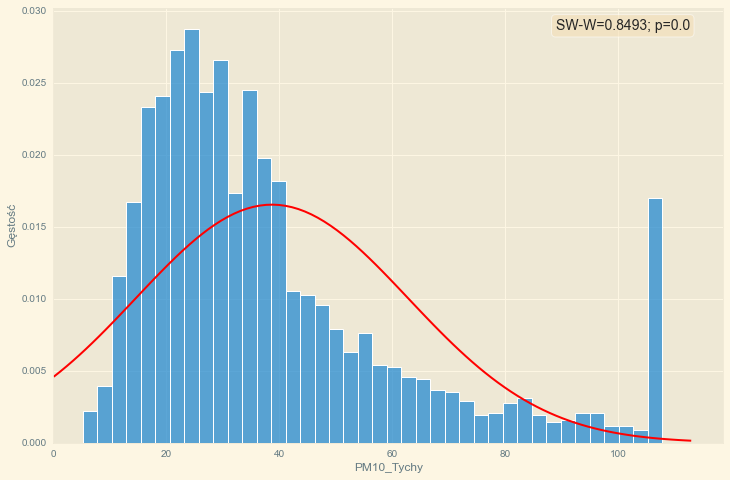

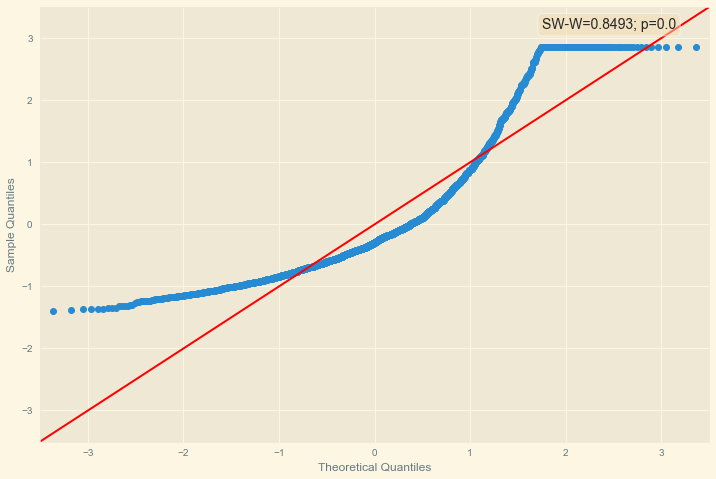

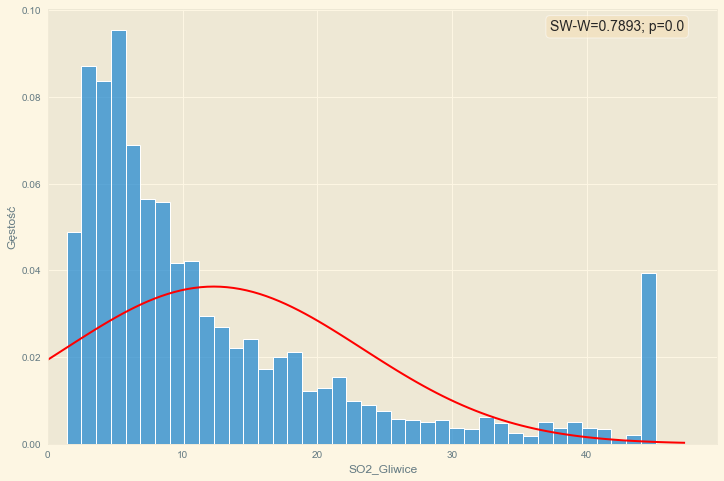

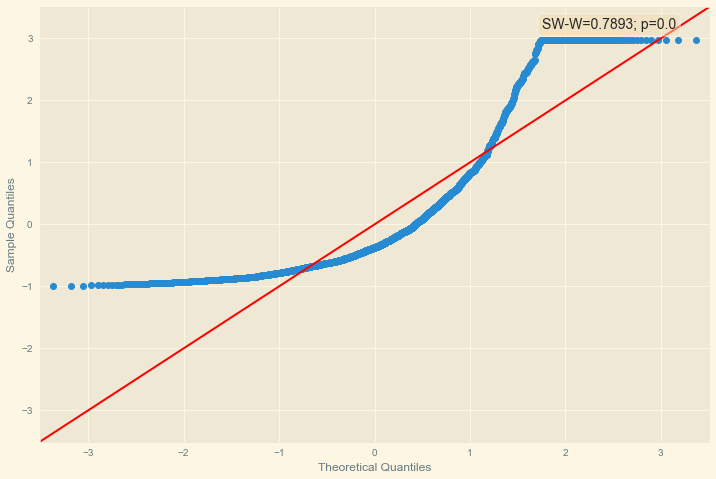

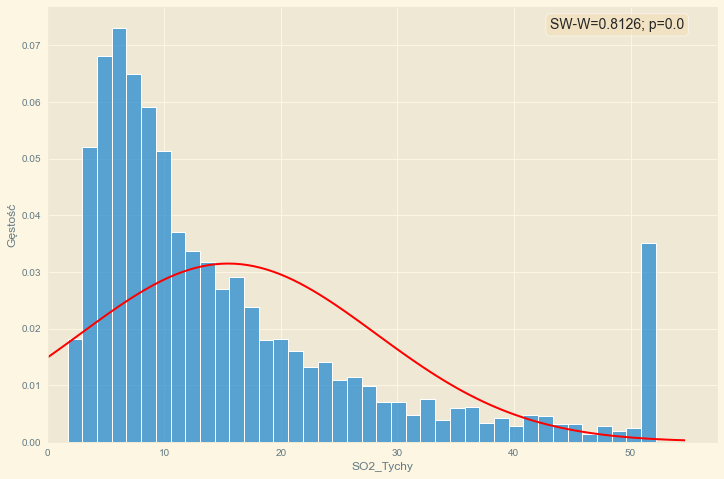

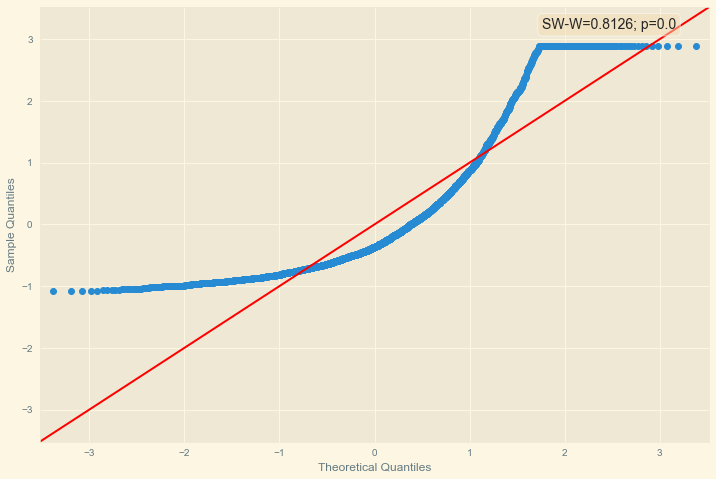

In [473]:
for col in cols:
    show_histogram(df[col])

In [474]:
from datetime import datetime, date

Y = 2000
seasons = [('zima', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('wiosna', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('lato', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('jesień', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('zima', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(d):
    if isinstance(d, datetime):
        d = d.date()
    d = d.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= d <= end)

df['Pora roku'] = pd.Categorical(df.index.map(get_season), categories=['wiosna', 'lato', 'jesień', 'zima'])
df

,NO_Gliwice,NO2_Gliwice,NOx_Gliwice,PM10_Gliwice,PM2.5_Gliwice,SO2_Gliwice,cisnienie_Gliwice,kier_Gliwice,opad_atm_Gliwice,predk_Gliwice,...,PM10_Tychy,SO2_Tychy,cisnienie_Tychy,kier_Tychy,opad_atm_Tychy,predk_Tychy,prom_Tychy,temp_Tychy,wilg_Tychy,Pora roku
2007-01-01,NaN,9.521739,NaN,14.666667,NaN,4.000000,NaN,NaN,NaN,NaN,...,10.125000,9.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
2007-01-02,NaN,17.347826,NaN,22.291667,NaN,NaN,NaN,NaN,NaN,NaN,...,17.291667,9.869565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
2007-01-03,NaN,17.476190,NaN,17.217391,NaN,2.750000,NaN,NaN,NaN,NaN,...,18.583333,8.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
2007-01-04,NaN,20.047619,NaN,13.333333,NaN,10.952381,NaN,NaN,NaN,NaN,...,8.333333,8.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
2007-01-05,NaN,13.565217,NaN,13.791667,NaN,3.260870,NaN,NaN,NaN,NaN,...,17.625000,13.826087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,14.347826,26.782609,49.045455,124.375072,101.0,45.102292,986.083333,117.875000,NaN,1.154167,...,55.875000,38.363636,984.541667,NaN,0.000000,NaN,14.416667,-7.663,86.916667,zima
2014-12-28,2.272727,10.000000,13.095238,53.500000,38.0,24.217391,987.583333,224.521739,NaN,1.939130,...,49.000000,19.652174,985.625000,NaN,0.000000,NaN,10.666667,-6.154,82.750000,zima
2014-12-29,2.666667,8.272727,12.684211,36.625000,27.0,12.863636,994.750000,307.666667,NaN,1.880952,...,41.083333,13.000000,992.916667,NaN,0.000000,NaN,14.333333,-5.408,79.333333,zima
2014-12-30,16.478261,16.739130,41.782609,67.142857,83.0,24.391304,1001.541667,253.260870,NaN,0.808696,...,68.500000,23.347826,999.958333,NaN,0.000000,NaN,27.708333,-8.054,77.083333,zima


In [475]:
def check(x):
    if x > 80:
        return 'źle'
    return 'dobrze'

df['PM10_Gliwice_ocena'] = df['PM10_Gliwice'].apply(check)
df['PM10_Tychy_ocena'] = df['PM10_Tychy'].apply(check)

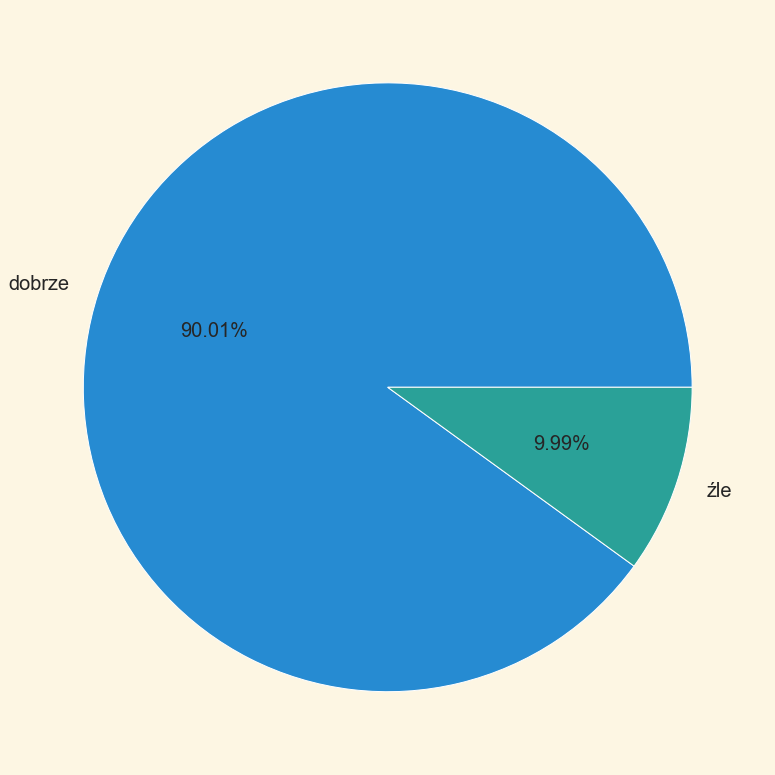

In [476]:
df.groupby('PM10_Gliwice_ocena').size().plot.pie(figsize=(14, 14), fontsize=20,autopct='%.2f%%')
plt.ylabel('')
plt.show()

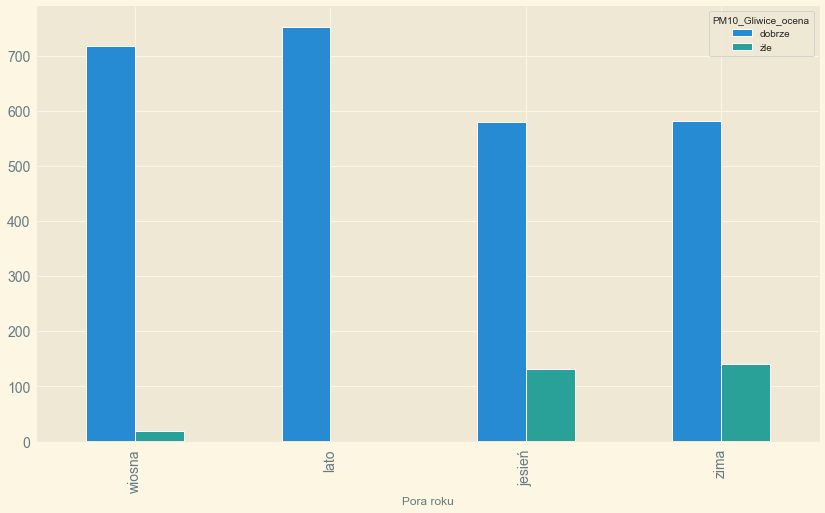

In [477]:
df.groupby(['PM10_Gliwice_ocena', 'Pora roku']).size().unstack(0).plot.bar(figsize=(14, 8), fontsize=14)
plt.show()

In [478]:
def show_corr(data, method):
    corr = data.corr(method=method.lower())
    display(corr)
    plt.figure(figsize=(15, 12))
    mask = np.triu(corr)
    sns.heatmap(corr, cmap='magma', annot=True, mask=mask)
    plt.title(f'Korelacje między zmiennymi ({method})', fontsize=16)
    plt.show()

,NO_Gliwice,NO2_Gliwice,NOx_Gliwice,PM10_Gliwice,PM2.5_Gliwice,SO2_Gliwice,cisnienie_Gliwice,kier_Gliwice,predk_Gliwice,prom_Gliwice,temp_Gliwice,wilg_Gliwice
NO_Gliwice,1.000000,0.682337,0.964154,0.664843,0.710299,0.481739,0.115301,-0.260776,-0.301966,-0.218539,0.026332,0.024782
NO2_Gliwice,0.682337,1.000000,0.850529,0.775707,0.749265,0.725967,0.102890,-0.475451,-0.378987,-0.194198,-0.338190,-0.159607
NOx_Gliwice,0.964154,0.850529,1.000000,0.768355,0.770598,0.617935,0.119208,-0.367719,-0.350860,-0.226190,-0.175334,-0.017707
PM10_Gliwice,0.664843,0.775707,0.768355,1.000000,0.896611,0.777651,0.270115,-0.428155,-0.275502,-0.233497,-0.341171,0.103373
PM2.5_Gliwice,0.710299,0.749265,0.770598,0.896611,1.000000,0.774762,0.288138,-0.312160,-0.185103,-0.336264,-0.507404,0.132480
SO2_Gliwice,0.481739,0.725967,0.617935,0.777651,0.774762,1.000000,0.123449,-0.503908,-0.082579,-0.403671,-0.526342,0.121477
cisnienie_Gliwice,0.115301,0.102890,0.119208,0.270115,0.288138,0.123449,1.000000,-0.032649,-0.219099,0.038557,0.081991,0.109960
kier_Gliwice,-0.260776,-0.475451,-0.367719,-0.428155,-0.312160,-0.503908,-0.032649,1.000000,0.234850,-0.105730,0.153978,-0.005172
predk_Gliwice,-0.301966,-0.378987,-0.350860,-0.275502,-0.185103,-0.082579,-0.219099,0.234850,1.000000,-0.163015,-0.034659,0.006285
prom_Gliwice,-0.218539,-0.194198,-0.226190,-0.233497,-0.336264,-0.403671,0.038557,-0.105730,-0.163015,1.000000,0.209507,-0.396790


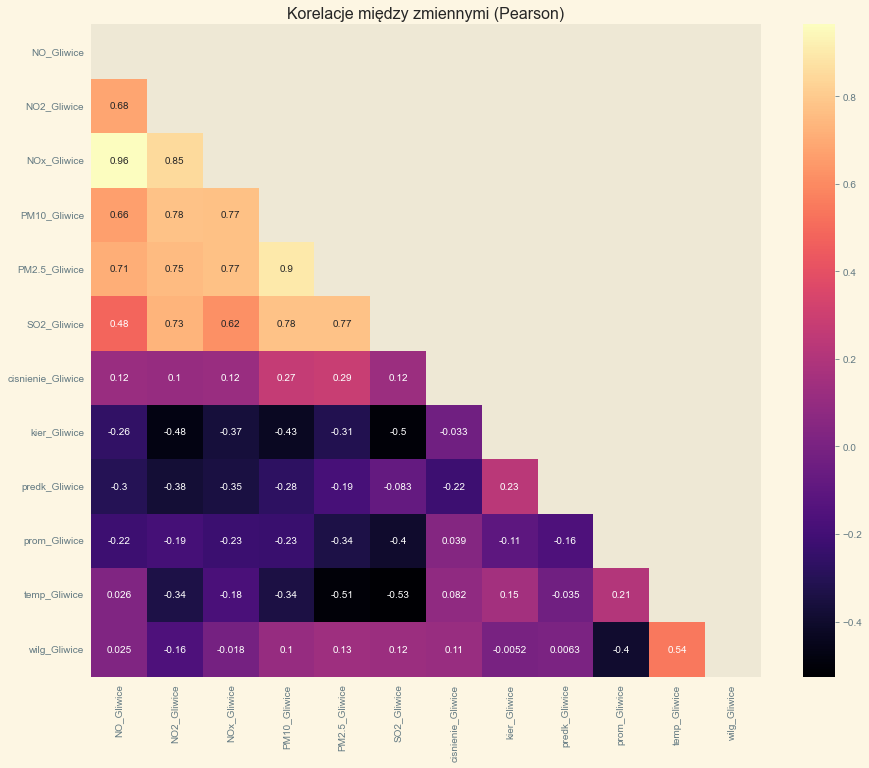

In [479]:
show_corr(df[cols_gliwice], 'Pearson')

,NO_Gliwice,NO2_Gliwice,NOx_Gliwice,PM10_Gliwice,PM2.5_Gliwice,SO2_Gliwice,cisnienie_Gliwice,kier_Gliwice,predk_Gliwice,prom_Gliwice,temp_Gliwice,wilg_Gliwice
NO_Gliwice,1.000000,0.859420,0.959677,0.727074,0.656381,0.577240,0.157094,-0.464357,-0.449010,-0.181598,0.067605,0.035120
NO2_Gliwice,0.859420,1.000000,0.956489,0.786847,0.704142,0.725557,0.098675,-0.552094,-0.398531,-0.183620,-0.326609,-0.132962
NOx_Gliwice,0.959677,0.956489,1.000000,0.803297,0.716308,0.682319,0.138955,-0.523767,-0.447188,-0.190579,-0.187525,-0.045906
PM10_Gliwice,0.727074,0.786847,0.803297,1.000000,0.900669,0.724456,0.253757,-0.528684,-0.317232,-0.156526,-0.305463,0.083847
PM2.5_Gliwice,0.656381,0.704142,0.716308,0.900669,1.000000,0.743833,0.271106,-0.467001,-0.153170,-0.322391,-0.526976,0.143139
SO2_Gliwice,0.577240,0.725557,0.682319,0.724456,0.743833,1.000000,0.072999,-0.614527,-0.107828,-0.381931,-0.489628,0.111467
cisnienie_Gliwice,0.157094,0.098675,0.138955,0.253757,0.271106,0.072999,1.000000,-0.020485,-0.200427,0.034253,-0.000715,0.050711
kier_Gliwice,-0.464357,-0.552094,-0.523767,-0.528684,-0.467001,-0.614527,-0.020485,1.000000,0.197226,-0.091352,0.180614,0.014616
predk_Gliwice,-0.449010,-0.398531,-0.447188,-0.317232,-0.153170,-0.107828,-0.200427,0.197226,1.000000,-0.174247,-0.163432,0.017836
prom_Gliwice,-0.181598,-0.183620,-0.190579,-0.156526,-0.322391,-0.381931,0.034253,-0.091352,-0.174247,1.000000,0.098061,-0.418505


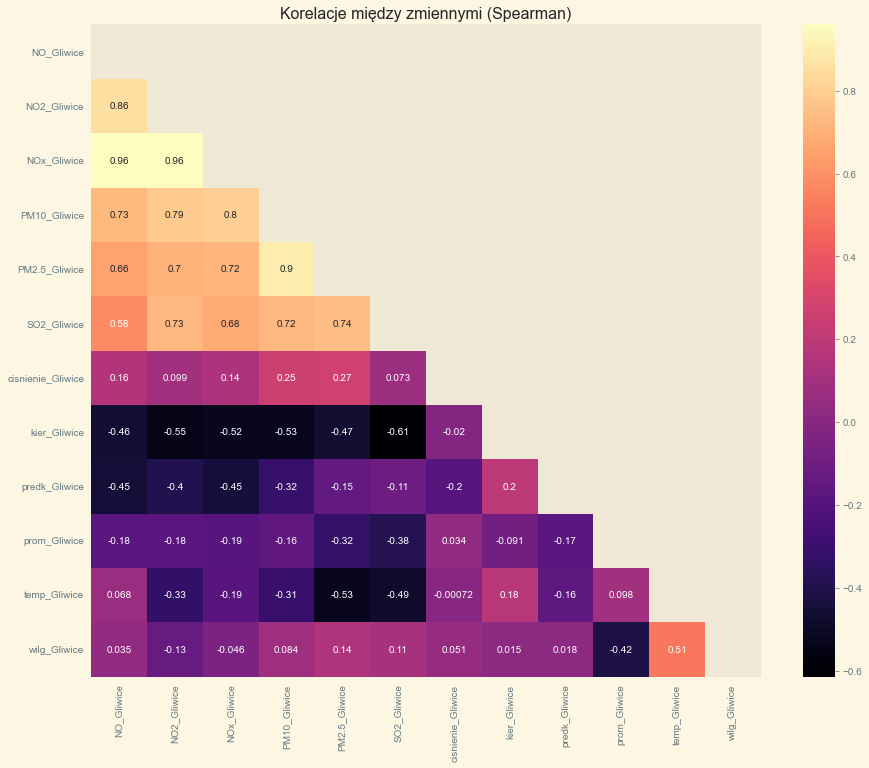

In [480]:
show_corr(df[cols_gliwice], 'Spearman')

In [481]:
def test_independence_groups(data, column, grouping_column, g1, g2):
    slice_a = data[data[grouping_column] == g1][column].dropna()
    slice_b = data[data[grouping_column] == g2][column].dropna()
    result = ttest_ind(slice_a, slice_b)
    return {
        'statystyka': result.statistic,
        'p-value': result.pvalue,
        'różnią się': result.pvalue < 0.05
    }

In [482]:
test_independence_groups(df,
                  column='PM10_Gliwice',
                  grouping_column='Pora roku',
                  g1='zima',
                  g2='lato')

{'statystyka': 17.139022770069406,
 'p-value': 4.288510145048194e-59,
 'różnią się': True}

In [483]:
def test_independence_variables(data, column1, column2):
    slice_a = data[column1].dropna()
    slice_b = data[column2].dropna()
    result = ttest_ind(slice_a, slice_b)
    return {
        'statystyka': result.statistic,
        'p-value': result.pvalue,
        'różnią się': result.pvalue < 0.05
    }

In [484]:
test_independence_variables(df, column1='PM10_Gliwice', column2='PM10_Tychy')

{'statystyka': 7.585094490172113,
 'p-value': 3.916899889090856e-14,
 'różnią się': True}

In [485]:
v = df['PM10_Gliwice'].dropna()
st.t.interval(alpha=0.95, df=v.count()-1, loc=v.mean(), scale=st.sem(v))

(43.110560311627616, 45.325710984213295)

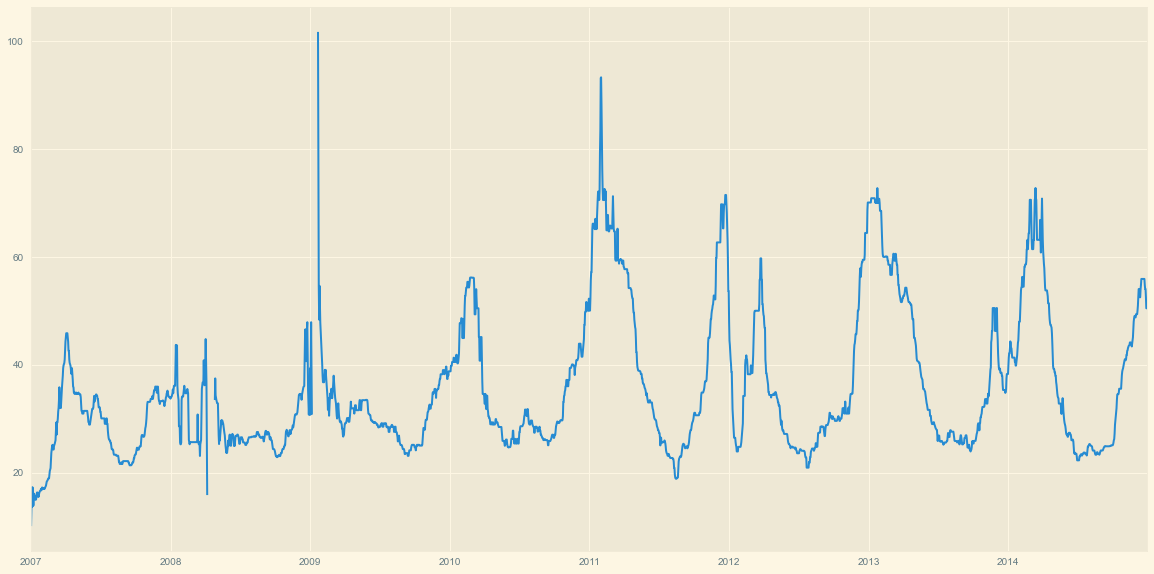

In [486]:
df['PM10_Tychy_wygładzone'] = df['PM10_Tychy'].rolling('60d').median()
df['PM10_Tychy_wygładzone'].plot(figsize=(20, 10))
plt.show()

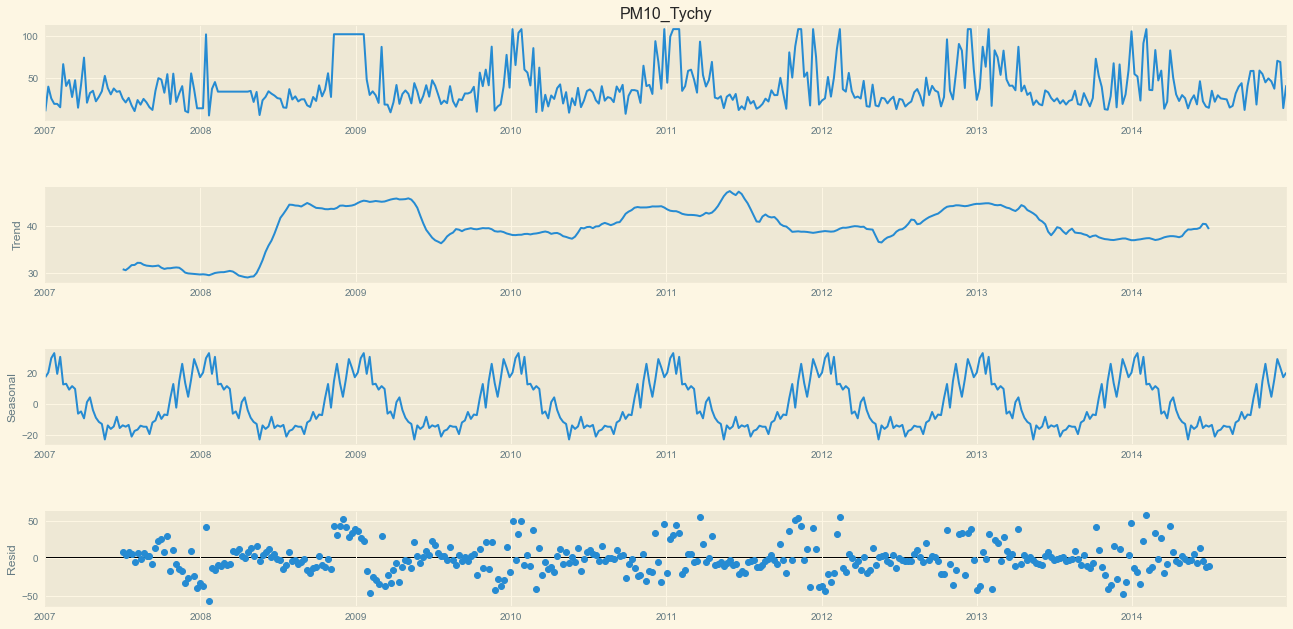

In [487]:
decomposition = sm.tsa.seasonal_decompose(df['PM10_Tychy'].fillna(method='bfill').asfreq('7d'), model='additive')
fig = decomposition.plot()
fig.set_size_inches((20, 10))
plt.show()

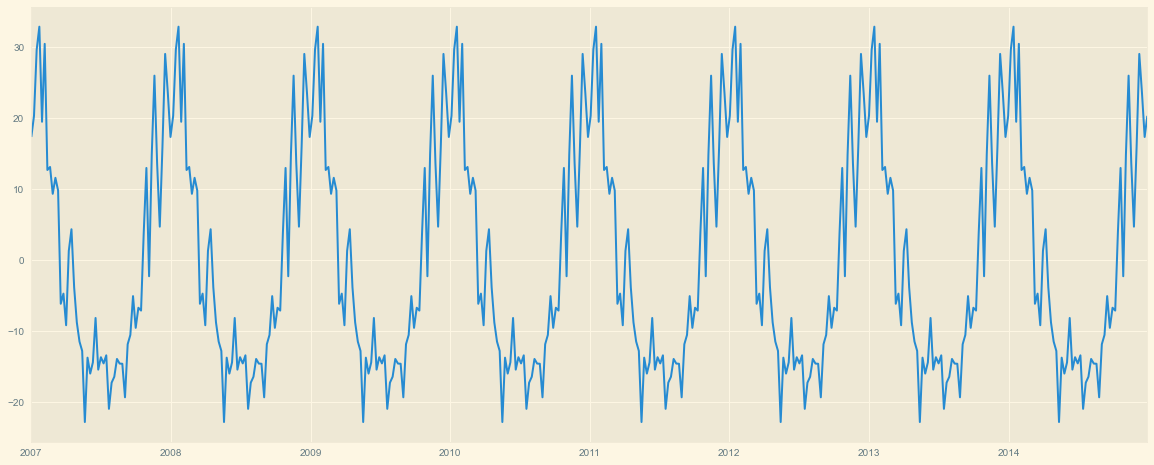

In [488]:
fig, ax = plt.subplots(figsize=(20, 8))
decomposition.seasonal.plot(ax=ax)
plt.show()

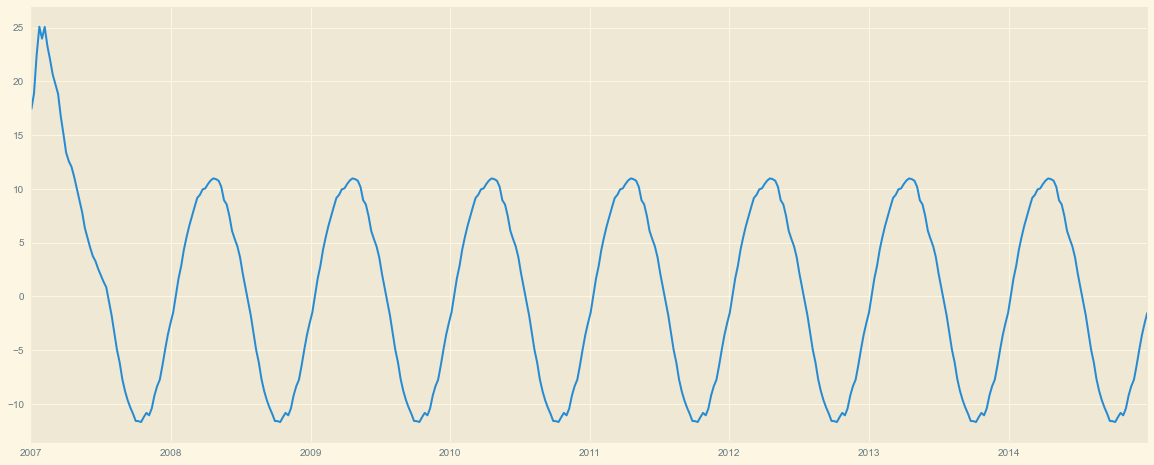

In [489]:
fig, ax = plt.subplots(figsize=(20, 8))
seasonal_s = decomposition.seasonal.rolling('200d').mean()
seasonal_s.plot(ax=ax)
plt.show()

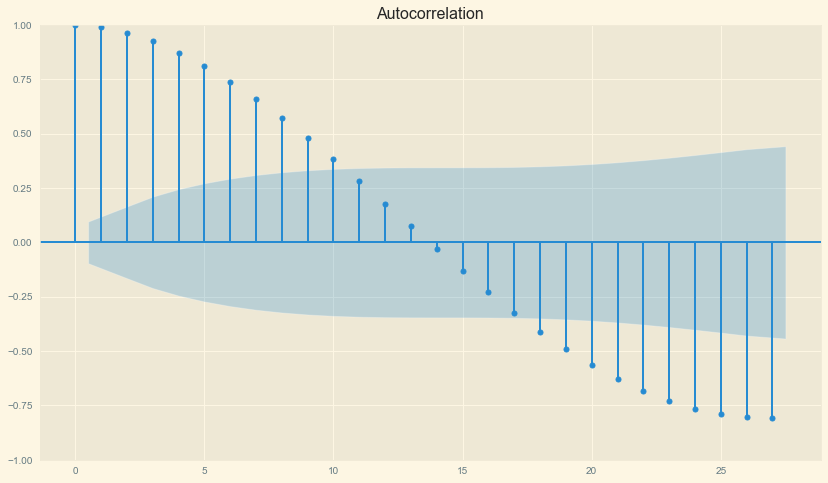

In [490]:
fig, ax = plt.subplots(figsize=(14, 8))
sm.graphics.tsa.plot_acf(seasonal_s, ax=ax)
plt.show()